In [5]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from magnons.energies import get_dispersion_theta, ev_in_HP_basis, plot_dispersion_ky
from magnons.yig import a, S, mu, J
from magnons.cgs import E_to_GHz
import matplotlib.pyplot as plt

In [2]:
kwargs = {
    "eps": a**-2,
    "a": a,
    "S": S,
    "mu": mu,
    "J": J,
    "E_to_GHz": E_to_GHz,
    "h": mu * 700,
    "Nr": 4,
    "Ng": 4,
}
kwargs["N"] = 100


In [3]:
E, ev, kvalues = get_dispersion_theta(0, 4, return_eigenfunctions=True, **kwargs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.28s/it]


C:\Users\Gunni002\Dropbox\UU\Magnons\Python\magnons\magnons\energies.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
  res[:, i] = ev[:N, i] + ev[N:, i]


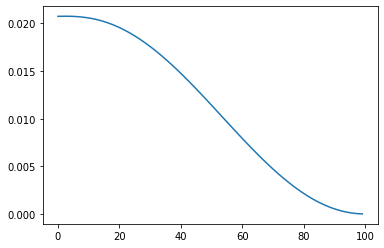

In [6]:
def plot_eigenfunction(k, n, kvalues, E, ev):
    diff = np.abs(kvalues - np.array(k))
    diff_distance = np.sqrt(np.sum(diff**2, axis=1))
    i = np.argmin(diff_distance)
    ev = ev[i]
    E = E[i]
    ev = ev_in_HP_basis(ev)
    plt.plot(np.abs(ev[:, n])**2)
plot_eigenfunction([10**6, 0], 0, kvalues, E, ev)

In [ ]:
len(E)

In [ ]:
np.argmin(np.sqrt(np.sum(np.abs(kvalues - np.array(k)), axis=1)))


In [ ]:
absk = np.sqrt(np.sum(res[2]**2, axis=1))
for i in range(6):
    plt.semilogx(absk, res[0][:, i], "-", color="black")